In [1]:
install.packages('lme4')
install.packages('ggplot2')
install.packages('dplyr')


The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//Rtmps3zlG2/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//Rtmps3zlG2/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//Rtmps3zlG2/downloaded_packages


In [2]:
library(lme4)
library(ggplot2)
library(dplyr)

Loading required package: Matrix


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
vf = read.csv('clean_vf_all.csv')

In [4]:
head(vf)

,Session,Date,Treatment,Protocol,Stage,dayspost,Trial,ID,Latency,Reason,Mode,Scoring,Force,TargetForce,RampDuration,CutoffTime,LegacyMode,TouchPause,TouchForce,TimeThreshold
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>
1,1,2024-03-12 16:21:00,CCD,AMN,PRE,0,C,DW 239,0.9,Detection,Ramp,Auto,33.81,75,2,30,OFF,1.2,0.1,0
2,2,2024-03-12 16:22:00,CCD,AMN,PRE,0,C,DW 239,0.1,Detection,Ramp,Auto,5.09,75,2,30,OFF,1.2,0.1,0
3,3,2024-03-12 16:22:00,CCD,AMN,PRE,0,C,DW 239,0.8,Detection,Ramp,Auto,31.31,75,2,30,OFF,1.2,0.1,0
4,4,2024-03-12 16:22:00,CCD,AMN,PRE,0,I,DW 239,0.5,Detection,Ramp,Auto,21.32,75,2,30,OFF,1.2,0.1,0
5,5,2024-03-12 16:23:00,CCD,AMN,PRE,0,I,DW 239,2.6,Detection,Ramp,Auto,75.00,75,2,30,OFF,1.2,0.1,0
6,6,2024-03-12 16:23:00,CCD,AMN,PRE,0,I,DW 239,0.5,Detection,Ramp,Auto,21.32,75,2,30,OFF,1.2,0.1,0


In [5]:
vf_i = subset(vf, Trial == 'I')

In [6]:
model = lmer(Force ~ dayspost + (1|ID) , data= vf_i)
summary(model)

Linear mixed model fit by REML ['lmerMod']
Formula: Force ~ dayspost + (1 | ID)
   Data: vf_i

REML criterion at convergence: 6749.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8326 -0.7563 -0.0812  0.7774  3.9675 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  36.54    6.044  
 Residual             178.16   13.348  
Number of obs: 837, groups:  ID, 16

Fixed effects:
            Estimate Std. Error t value
(Intercept) 30.63423    1.70685  17.948
dayspost    -0.56044    0.06279  -8.926

Correlation of Fixed Effects:
         (Intr)
dayspost -0.323

# observations: 
* Force threshold significantly decreases for every additional day. Force drops by 0.56g per day on an average.
* High variance in the baseline force of individual rats. The random intercept for ID reduces error inflation due to this variation.
  * Random intercept variance (baseline force differences): 36.54
  * Residual variance (trial-to-trial variability): 178.16

In [7]:
install.packages('ggeffects')


The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//Rtmps3zlG2/downloaded_packages


In [8]:
library(ggeffects)

In [9]:
# 
pred = predict_response(model, terms = 'dayspost')

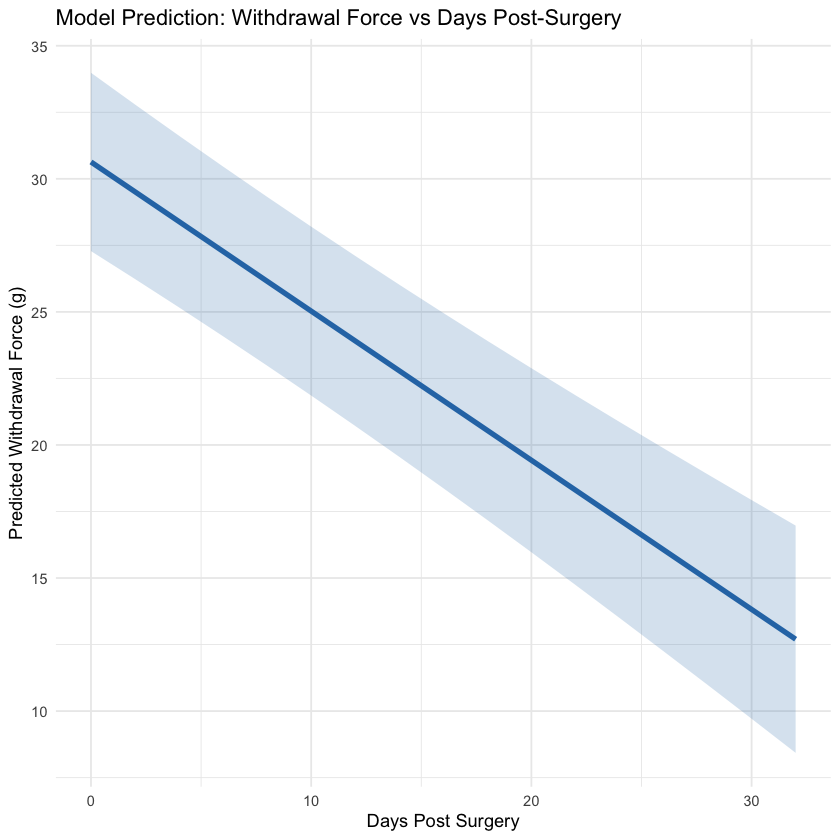

In [10]:
ggplot( data = pred, aes(x=x, y =predicted)) + 
geom_line(linewidth = 1.5, color = "#2C77B4") + 
geom_ribbon(aes(ymin = conf.low, ymax = conf.high), fill = "#2C77B4", alpha = 0.2) + 
labs(
    title = "Model Prediction: Withdrawal Force vs Days Post-Surgery",
    x = "Days Post Surgery",
    y = "Predicted Withdrawal Force (g)"
  ) +
  theme_minimal()


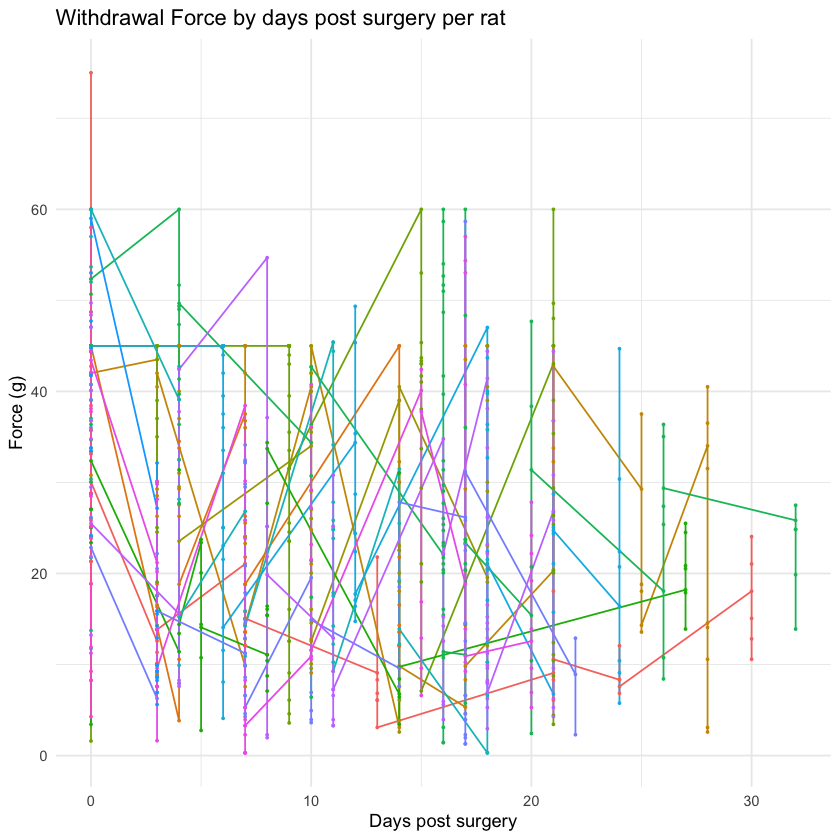

In [11]:
ggplot(vf_i, aes(x= dayspost, y = Force, group = ID, color = ID))+ 
geom_line(linewidth = 0.5)+ 
geom_point(size = 0.4) + 
labs (
    x = 'Days post surgery', 
    y = 'Force (g)', 
    title = 'Withdrawal Force by days post surgery per rat '
    ) + 
theme_minimal() +
theme(legend.position = "none")

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 14.07”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 10.07”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  3.6091e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 49”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 21.105”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 12.105”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  2.4787e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = par

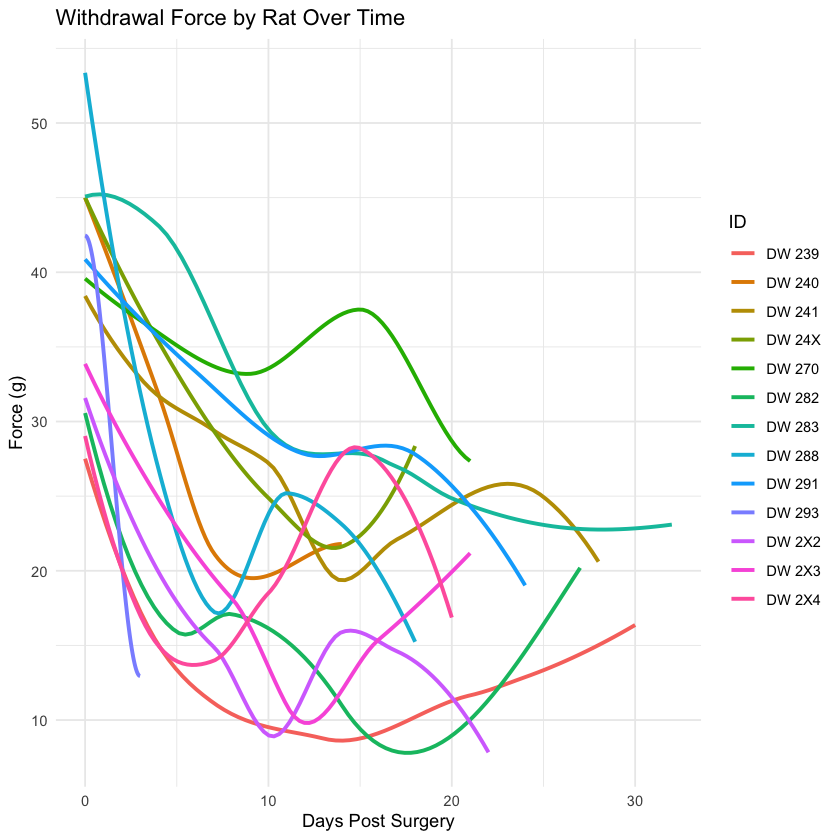

In [25]:
ggplot(vf_i, aes(x = dayspost, y = Force, group = ID, color = ID)) +
  geom_smooth(method = "loess", se = FALSE, size = 1.1) +
  labs(title = "Withdrawal Force by Rat Over Time",
       x = "Days Post Surgery", y = "Force (g)") +
  theme_minimal()

In [13]:
ggplot(vf_i, aes(x = dayspost, y = Force, group = ID)) +
  geom_smooth(method = loess, size = 1, se = FALSE) +
  geom_line(data = pred, aes(x = x, y = predicted), color = "black", size = 1.5) +
  geom_ribbon(data = pred, aes(x = x, ymin = conf.low, ymax = conf.high), fill = "black", alpha = 0.2) +
  labs(
    title = "Withdrawal Force by Day (Per Rat + Model Prediction)",
    x = "Days Post Surgery",
    y = "Force (g)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

ERROR while rich displaying an object: Error in `geom_line()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 2nd layer.
Caused by error:
! object 'ID' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .     

In [20]:
ggplot(vf_i, aes(x = dayspost, y = Force, group = ID, color = ID)) +
  geom_line(aes(color = ID), alpha = 0.3) +
  geom_point(aes(color = ID), alpha = 0.3) +
  geom_line(data = pred, aes(x = x, y = predicted), color = "black", size = 1.5) +
  geom_ribbon(data = pred, aes(x = x, ymin = conf.low, ymax = conf.high), fill = "black", alpha = 0.2) +
  labs(
    title = "Withdrawal Force by Day (Per Rat + Model Prediction)",
    x = "Days Post Surgery",
    y = "Force (g)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

ERROR while rich displaying an object: Error in `geom_line()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 3rd layer.
Caused by error:
! object 'ID' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .     

In [16]:
str(vf_i)

'data.frame':	837 obs. of  20 variables:
 $ Session      : int  4 5 6 7 8 9 10 11 12 13 ...
 $ Date         : chr  "2024-03-12 16:22:00" "2024-03-12 16:23:00" "2024-03-12 16:23:00" "2024-03-12 16:24:00" ...
 $ Treatment    : chr  "CCD" "CCD" "CCD" "CCD" ...
 $ Protocol     : chr  "AMN" "AMN" "AMN" "AMN" ...
 $ Stage        : chr  "PRE" "PRE" "PRE" "PRE" ...
 $ dayspost     : int  0 0 0 0 3 3 3 3 3 3 ...
 $ Trial        : chr  "I" "I" "I" "I" ...
 $ ID           : chr  "DW 239" "DW 239" "DW 239" "DW 239" ...
 $ Latency      : num  0.5 2.6 0.5 0.8 0.3 0.2 0.2 0.2 0.1 0.2 ...
 $ Reason       : chr  "Detection" "Detection" "Detection" "Detection" ...
 $ Mode         : chr  "Ramp" "Ramp" "Ramp" "Ramp" ...
 $ Scoring      : chr  "Auto" "Auto" "Auto" "Auto" ...
 $ Force        : num  21.3 75 21.3 30.1 12.6 ...
 $ TargetForce  : int  75 75 75 75 75 75 75 75 75 75 ...
 $ RampDuration : int  2 2 2 2 2 2 2 2 2 2 ...
 $ CutoffTime   : int  30 30 30 30 30 30 30 30 30 30 ...
 $ LegacyMode   : chr  "

In [18]:
colnames(vf_i)


[1] "Session"       "Date"          "Treatment"     "Protocol"     
 [5] "Stage"         "dayspost"      "Trial"         "ID"           
 [9] "Latency"       "Reason"        "Mode"          "Scoring"      
[13] "Force"         "TargetForce"   "RampDuration"  "CutoffTime"   
[17] "LegacyMode"    "TouchPause"    "TouchForce"    "TimeThreshold"

In [21]:
'ID' %in% names(vf_i)

[1] TRUE

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 14.07”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 10.07”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  3.6091e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 49”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 21.105”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 12.105”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  2.4787e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = par

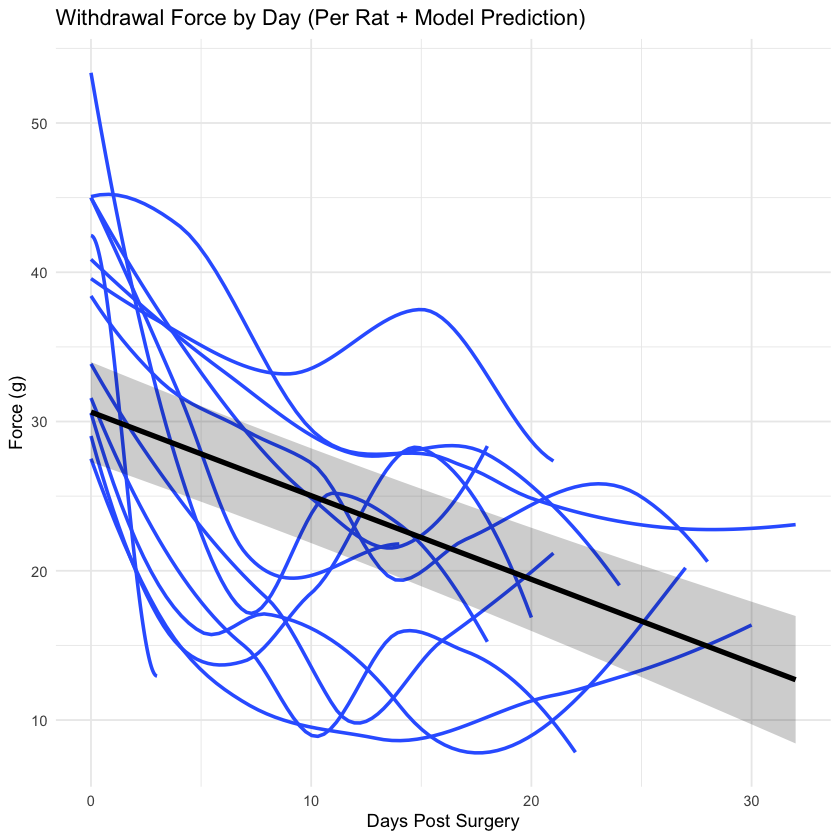

In [22]:
ggplot(vf_i, aes(x = dayspost, y = Force, group = ID)) +
  geom_smooth(method = loess, size = 1, se = FALSE) +
  geom_line(data = pred, mapping = aes(x = x, y = predicted), color = "black", size = 1.5, inherit.aes = FALSE) +
  geom_ribbon(data = pred, mapping = aes(x = x, ymin = conf.low, ymax = conf.high), fill = "black", alpha = 0.2, inherit.aes = FALSE) +
  labs(
    title = "Withdrawal Force by Day (Per Rat + Model Prediction)",
    x = "Days Post Surgery",
    y = "Force (g)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

In [23]:
#comparison between random intercept and random slope model 

m1 = lmer(Force ~ dayspost + (1|ID), data = vf_i)
m2 = lmer(Force ~ dayspost + (dayspost|ID), data = vf_i) 
anova(m1, m2)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0157867 (tol = 0.002, component 1)”
refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,-2*log(L),Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m1,4,6756.129,6775.048,-3374.064,6748.129,NA,NA,NA
m2,6,6753.127,6781.506,-3370.564,6741.127,7.001768,2,0.0301707


In [24]:
summary(m2)

Linear mixed model fit by REML ['lmerMod']
Formula: Force ~ dayspost + (dayspost | ID)
   Data: vf_i

REML criterion at convergence: 6741.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8666 -0.7353 -0.0742  0.7558  4.2884 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr 
 ID       (Intercept)  60.18122  7.7577       
          dayspost      0.07035  0.2652  -0.72
 Residual             174.41845 13.2068       
Number of obs: 837, groups:  ID, 16

Fixed effects:
            Estimate Std. Error t value
(Intercept) 30.90268    2.09842  14.727
dayspost    -0.58807    0.09565  -6.148

Correlation of Fixed Effects:
         (Intr)
dayspost -0.651
optimizer (nloptwrap) convergence code: 0 (OK)
Model failed to converge with max|grad| = 0.0157867 (tol = 0.002, component 1)
